Copyright (C) 2023, Alexandre Didier, Jérôme Sieber, Rahel Rickenbach and Shao (Mike) Zhang, ETH Zurich,
{adidier,jsieber, rrahel}@ethz.ch

All rights reserved.

This code is only made available for students taking the advanced MPC 
class in the fall semester of 2023 (151-0371-00L) and is NOT to be 
distributed.

### Nominal MPC

In [7]:
# enable seamless adoption of changes to external python scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
from ampyc.params import MPCParams
from ampyc.systems import LinearSystem
from ampyc.controllers import MPC
from ampyc.plotting import plot_x_state_time, plot_x_state_state, plot_u

In [9]:
# set random seed
np.random.seed(0)

##### Get parameters and define system and controller

In [10]:
params = MPCParams()
sys = LinearSystem(params.sys)
ctrl = MPC(sys, params.ctrl)

##### Simulate the closed-loop system

In [11]:
# trajectories starting in x_0
num_steps = params.sim.num_steps
num_traj = params.sim.num_traj
x_0 = params.sim.x_0

# allocate state and input trajectories
x = np.zeros((num_steps+1, sys.n, num_traj))
u = np.zeros((num_steps, num_traj))
x[0,:,:] = x_0

# control-loop
for i in range(num_traj):
    for j in range(num_steps):
        sol_u, sol_x, error_msg = ctrl.solve(x[j,:,i], additional_parameters={}, verbose=False)
        if error_msg != None:
            raise Exception(error_msg)
        u[j,i] = sol_u[:,0]
        x[j+1,:,i] = sys.step(x[j,:,i], u[j,i]).reshape(-1)

##### Plot results

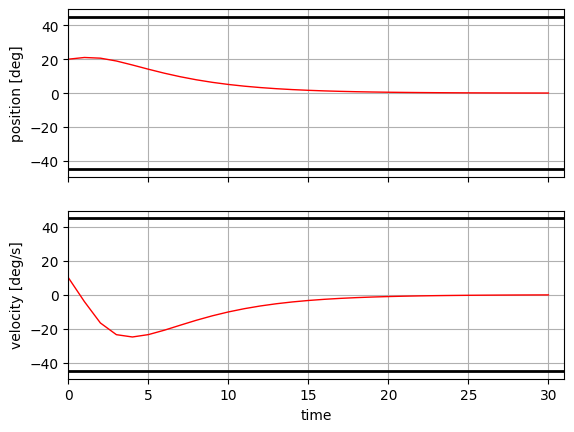

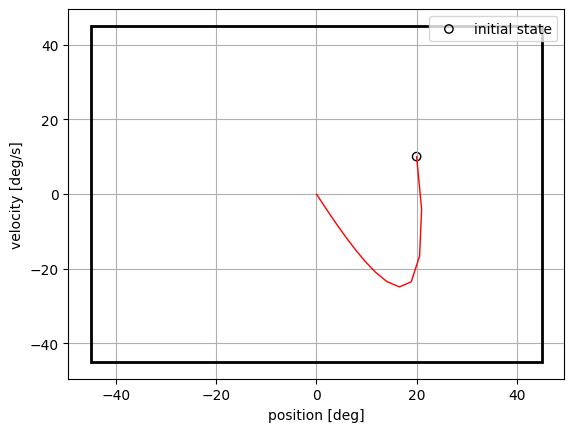

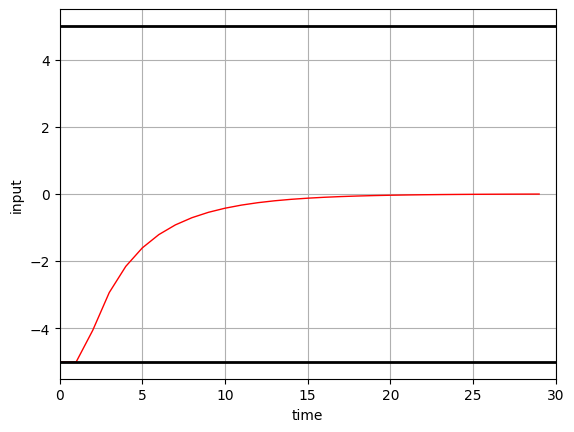

In [12]:
plot_x_state_time(1, x, sys.X, params.plot)
plot_x_state_state(2, x, sys.X, params.plot)
plot_u(3, u, sys.U, params.plot)